# Predictng Heart Disease using Machine learning

In this notebook we can build a machine learning model of predicting whether or not someone has heart disease
or not on their medical based attributes

We are using following approchs
1. Problem Deifination
2. Data
3. Evaluation
4. Features
5. Modeliing
6. Experimenatation

## 1. Problem Definition

> Given clinical parameters about a patient , can we predict whether or not they have heart disease?

## 2. Data

> The original data came from the Cleavland data from the UCI Machine Learning Repository. 

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

In [1]:
# Getting ready Tools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# importing model
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
# loading data

df = pd.read_csv("heart-disease.csv")
df.head()
df.shape

(303, 14)

In [3]:
# Data analysis (Exploration Data analysis)

df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

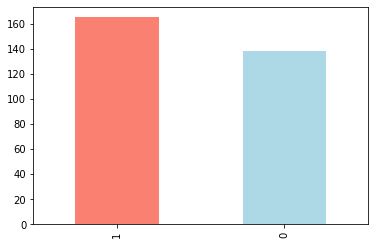

In [5]:
df["target"].value_counts().plot(kind = "bar", color = ["salmon", "lightblue"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

## Heart Disease Frequency according to Sex

In [10]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

<AxesSubplot:>

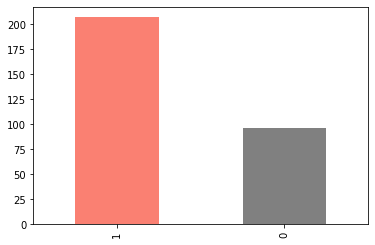

In [11]:
df["sex"].value_counts().plot(kind = "bar", color = ["salmon", "grey"])

In [12]:
# compare target coloumn with sex
pd.crosstab(df.target, df.sex)

sex      0    1
target         
0       24  114
1       72   93

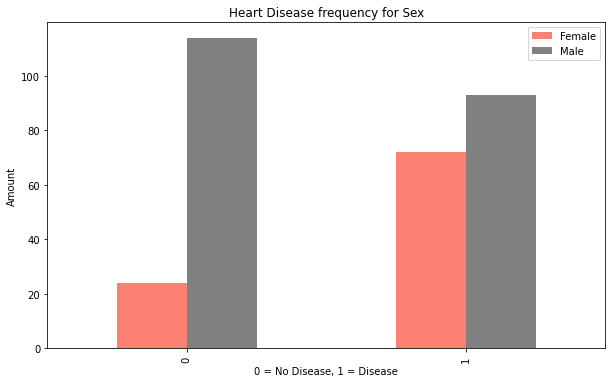

In [13]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6) ,color = ["salmon", "grey"])

plt.title("Heart Disease frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
# plt.xticks()

In [14]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [15]:
df["thalach"].value_counts().max()

11

## Age vs Max Heart Rate for Heart Disease

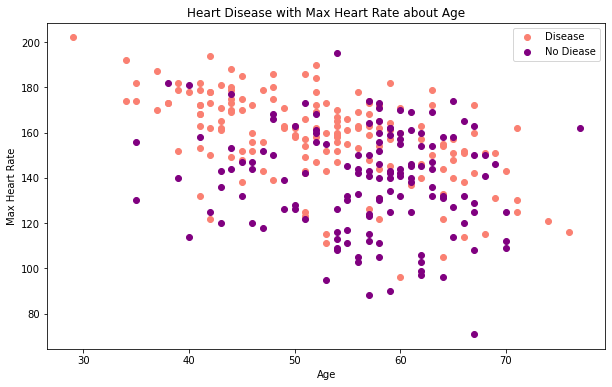

In [16]:
plt.figure(figsize = (10,6))

# scatter with positive values
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
           c="salmon");

# scatter with negative values
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c = "purple")
plt.title("Heart Disease with Max Heart Rate about Age")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Diease"]);

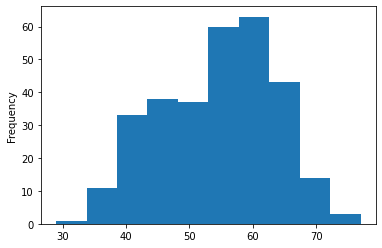

In [17]:
df.age.plot.hist();

In [18]:
pd.crosstab(df.cp, df.target)

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16

## Heart Disease frequency per Chest Pain Type

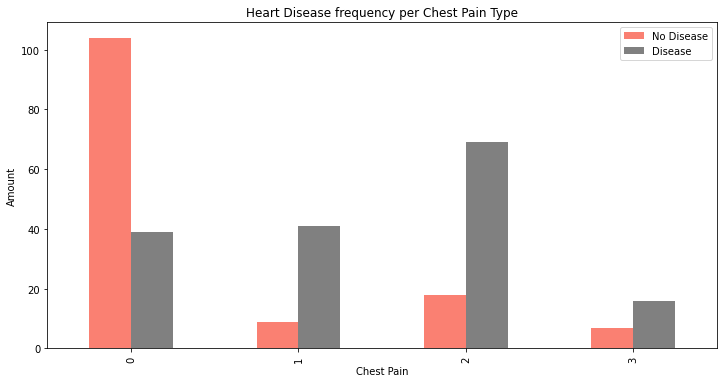

In [19]:
pd.crosstab(df.cp, df.target).plot(kind = "bar", 
                                   figsize=(12,6), 
                                   color=["salmon", "grey"])

plt.title("Heart Disease frequency per Chest Pain Type")
plt.xlabel("Chest Pain")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"]);

In [20]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [21]:
# Corellation matrix

df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

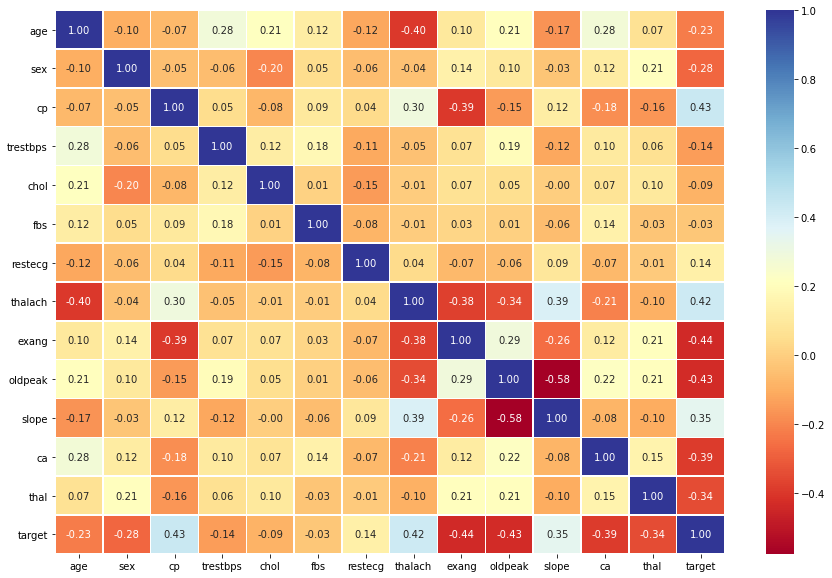

In [22]:
c_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(c_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="RdYlBu")

In [23]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [24]:
# spliting data
# X is dependent variable
#y is labels

X = df.drop("target", axis = 1)
y = df["target"]

In [25]:
# splitting our data into 80% of traning and 20% of testing

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [26]:
X_train #splitting data into 80% of our data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
132   42    1   1       120   295    0        1      162      0      0.0   
202   58    1   0       150   270    0        0      111      1      0.8   
196   46    1   2       150   231    0        1      147      0      3.6   
75    55    0   1       135   250    0        0      161      0      1.4   
176   60    1   0       117   230    1        1      160      1      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
188   50    1   2       140   233    0        1      163      0      0.6   
71    51    1   2        94   227    0        1      154      1      0.0   
106   69    1   3       160   234    1        0      131      0      0.1   
270   46    1   0       120   249    0        0      144      0      0.8   
102   63    0   1       140   195    0        1      179      0      0.0   

     slope  ca  thal  
132      2   0     2  
202      2   0     3  
196      1   0     2  
75       1   0     2  
176      2   2     3  
..     ...  ..   ...  
188      1   1     3  
71       2   1     3  
106      1   1     2  
270      2   0     3  
102      2   2     2  

[242 rows x 13 columns]

In [27]:
y_train, len(y_train) # it also X_train but can display only labels

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

 Traning data (find the pattrens)
 
 Testing data (use the patterns)

### building Machine learning model using Classification

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [28]:
# Importing models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

models = {"logictic regression": LogisticRegression(),
        "Kneighbors": KNeighborsClassifier(),
        "random forest": RandomForestClassifier()}

def fit_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

output = fit_score(models,X_train, X_test, y_train, y_test)
output

C:\Users\Sannan Uzair\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logictic regression': 0.8852459016393442,
 'Kneighbors': 0.6885245901639344,
 'random forest': 0.8360655737704918}

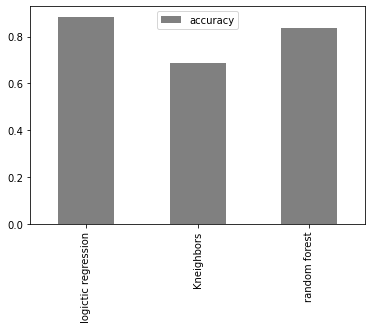

In [29]:
compare = pd.DataFrame(output, index=["accuracy"])
# compare.plot(kind="bar", figsize=(10,6))
compare.T.plot.bar(color = ["grey"]);

### Make predictions on our models

* Hyperparameter Tuning (KNeigborsClassifier)
* Feature importance
* Confusion matrix 
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC under curve
* Area under curve

In [30]:
# Hyper paramter tuning (By hand method)

train_scores = []
test_scores = []

neighbours = range(1,21)
knn = KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [31]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [32]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data is : 75.41%


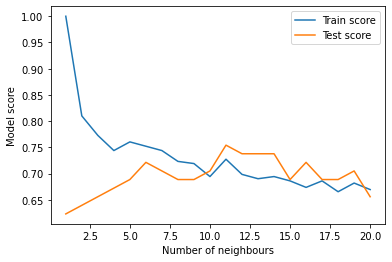

In [33]:
plt.plot(neighbours, train_scores, label = "Train score")
plt.plot(neighbours, test_scores, label = "Test score")

plt.xlabel("Number of neighbours")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data is :{max(test_scores)*100: .2f}%")

In [34]:
# Hyperparameter using [Logictic Regression, RandomForeserClassifier (RandomizeSearchCV )]

# In computational complexity theory, a log-space reduction is a reduction computable by a 
# deterministic Turing machine using logarithmic space. Conceptually, this means it can keep 
# a constant number of pointers into the input, along with a logarithmic number of 
# fixed-size integers.

logic_grid = {"C": np.logspace(-4,4,20),
             "solver": ["liblinear"]}
random_grid = {"n_estimators": np.arange(10,1000,50),
              "max_depth": [None, 3, 5, 10],
              "min_samples_split": np.arange(2,20,2),
              "min_samples_leaf": np.arange(1,20,2)}

In [35]:
# Tuning LogisticRegression

np.random.seed(42)
randomForest_log = RandomizedSearchCV(LogisticRegression(),
                                     param_distributions = logic_grid,
                                     cv=5,
                                     n_iter=20,
                                     verbose = True)
randomForest_log.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
randomForest_log.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [37]:
randomForest_log.score(X_test, y_test)

0.8852459016393442

In [38]:
# logictic regression using RandomForesrtClassifier

np.random.seed(42)
randomSearch_randomForest = RandomizedSearchCV(RandomForestClassifier(),
                                              param_distributions = random_grid,
                                              cv=5,
                                               n_iter=20,
                                              verbose = True)
randomSearch_randomForest.fit(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [39]:
randomSearch_randomForest.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 9,
 'max_depth': 5}

In [40]:
randomSearch_randomForest.score(X_test, y_test)

0.9016393442622951

In [41]:
output

{'logictic regression': 0.8852459016393442,
 'Kneighbors': 0.6885245901639344,
 'random forest': 0.8360655737704918}

### Hyperparametr Tuning using GridSearchCV

In [42]:
#Logictic Regression

log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv=5,
                         verbose=True)
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [43]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [44]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

* Precision
* Recall
* F1 score
* Classification report
* ROC under curve
* Area under curve
* Classification report

In [45]:
# Making prediction using tuned model

y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

### Roc curve function using Scikit Learn 

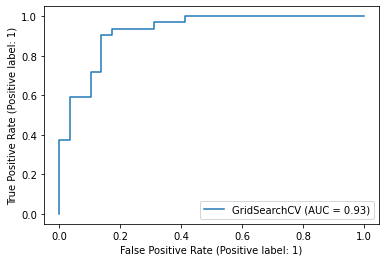

In [46]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(gs_log_reg, X_test, y_test)

In [47]:
# Confusion metrics

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


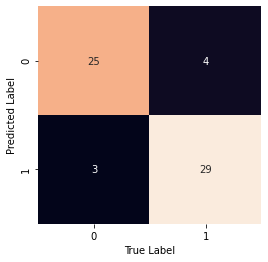

In [48]:
def plot_conf_matrix(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
plot_conf_matrix(y_test, y_preds)

# In this heatmap using True Postive ,False Positive, True Negative, False Negative

In [49]:
# Classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [50]:
# calculating evaluation metrics using cross validaiton

clf = LogisticRegression(C= 0.20433597178569418,
                         solver= "liblinear")

In [51]:
# cross validation accuracy

from sklearn.model_selection import cross_val_score

cv_ac = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
np.mean(cv_ac)

0.8446994535519124

In [52]:
# cross validation precision

from sklearn.metrics import precision_score
cv_pre = cross_val_score(clf, X, y, cv=5, scoring="precision")
np.mean(cv_pre)

0.8207936507936507

In [53]:
# cross validation recall

from sklearn.metrics import recall_score
cv_recl = cross_val_score(clf, X ,y,cv=5, scoring="recall")
np.mean(cv_recl)

0.9212121212121213

In [54]:
# cross validation f1-score
cv_f1 = cross_val_score(clf, X ,y, cv=5, scoring="f1")
np.mean(cv_f1)

0.8673007976269721

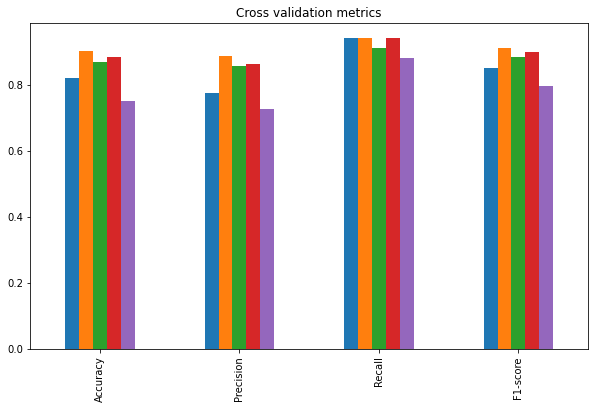

In [55]:
metrics = pd.DataFrame({"Accuracy": cv_ac,
                       "Precision": cv_pre,
                       "Recall": cv_recl,
                       "F1-score": cv_f1})
metrics.T.plot.bar(title = "Cross validation metrics",
                  legend=False,
                  figsize=(10,6));

In [56]:
clf = LogisticRegression(C= 0.20433597178569418,
                         solver= "liblinear")
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [57]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [58]:
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [59]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

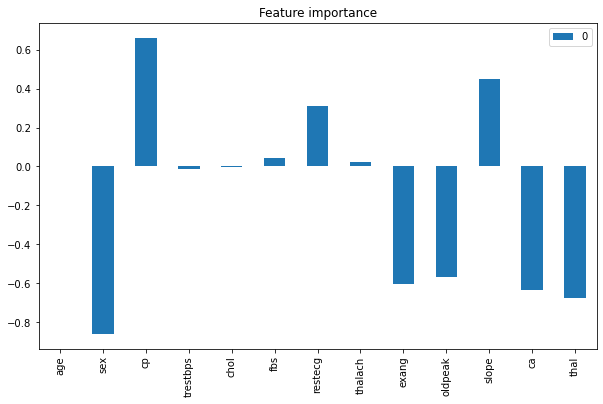

In [60]:
features = pd.DataFrame(feature_dict, index=[0])
features.T.plot.bar(title="Feature importance", figsize=(10,6));

In [61]:
pd.crosstab(df["sex"], df["target"])
# when sex value increase the target value decrease.

target    0   1
sex            
0        24  72
1       114  93

### slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

In [62]:
pd.crosstab(df["slope"], df["target"])
# when slope value increases the target value also increases

target   0    1
slope          
0       12    9
1       91   49
2       35  107

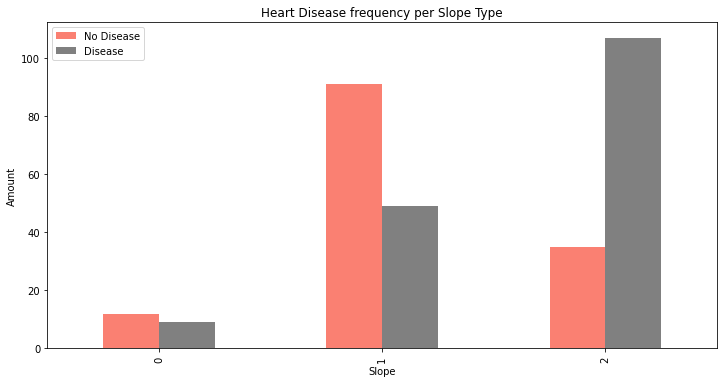

In [63]:
pd.crosstab(df.slope, df.target).plot(kind = "bar", 
                                   figsize=(12,6), 
                                   color=["salmon", "grey"])

plt.title("Heart Disease frequency per Slope Type")
plt.xlabel("Slope")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"]);